**Problema** 3-6

Se cuenta con los siguientes datos de composición de las fases líquida y vapor, y de presión de vapor, para soluciones líquidas de éter etílico (1) y acetona (2) a 30 °C:

\begin{array}{|l|c|c|}
\hline
x_{1}&0,000&0,020&0,066&0,162&0,504&0,749&0,867&1,000\\
\hline
y_{1}&0,000&0,070&0,210&0,406&0,700&0,827&0,896&1,000\\
\hline
p /kPa&38,02&39,65&45,04&54,61&74,37&82,25&84,93&86,66\\
\hline
\end{array}

a) Grafique las presiones parciales de ambos componentes y la presión total en función de la composición de la fase líquida. Indique en el mismo gráfico las curvas correspondientes al comportamiento predicho por el modelo de mezclas ideales.

b) Obtenga las constantes de Henry de éter en acetona y de acetona en éter, a 30 °C.

**Resolución:**

**a)** Nos piden graficar los datos experimentales, así como también los esperados para el comportamiento ideal.

Comencemos por graficar lo que ya tenemos. Para ello,vamos a importar algunas bibliotecas y cargar los datos en nuestro código:

In [1]:
import numpy as np #para hacer cuentas y usar sus arrays, que son muy versátiles
import matplotlib.pyplot as plt #para graficar
from scipy.optimize import curve_fit #para hacer ajustes
from sklearn.metrics import r2_score #para computarle el R2 a los ajustes 

#Armo arrays de numpy con los datos experimentales
x1=np.array([0.000,0.020,0.066,0.162,0.504,0.749,0.867,1.000])
y1=np.array([0.000,0.070,0.210,0.406,0.700,0.827,0.896,1.000])
pt=np.array([38.02,39.65,45.04,54.61,74.37,82.25,84.93,86.66]) #kPa

#Calculo presiones parciales con la Ley de Dalton
p1=pt*y1
p2=pt-p1

plt.plot(x1,pt, label="pt") 
plt.plot(x1,p1, label="p1") 
plt.plot(x1,p2, label="p2") 
plt.xlabel('x1') #Rótulo de eje horizontal
plt.ylabel('p(kPa)') #Rótulo de eje vertical
plt.xlim([0.0, 1.0]) #Solo nos interesa el plot en este rango de x1
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla

<Figure size 640x480 with 1 Axes>

Ahora grafiquemos lo que esperamos idealmente. Más concretamente, graficaremos lo que esperamos según la Ley de Raoult:

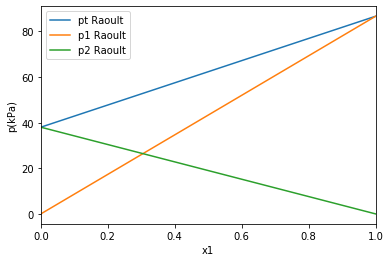

In [2]:
#Uso que el primer punto de pt es para x1=0 y el último para x1=1
p1puro=pt[len(pt)-1]
p2puro=pt[0]

#Luego, según Raoult:

p1Raoult=x1*p1puro
p2Raoult=(1-x1)*p2puro
ptRaoult=p1Raoult+p2Raoult

#Y graficamos
plt.plot(x1,ptRaoult, label="pt Raoult") 
plt.plot(x1,p1Raoult, label="p1 Raoult") 
plt.plot(x1,p2Raoult, label="p2 Raoult") 
plt.xlabel('x1') #Rótulo de eje horizontal
plt.ylabel('p(kPa)') #Rótulo de eje vertical
plt.xlim([0.0, 1.0]) #Solo nos interesa el plot en este rango de x1
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla


**b)** Ahora nos piden las constantes de henry de cada gas. Esto no es otra cosa que la pendiente de los plots cuando el componente está muy diluido: Esto es, cuando $x_{1} \to 0$ para ($1$) y cuando $x_{1} \to 1$ para ($2$).

Ajustaremos un polinomio, lo derivaremos analíticamente y luego haremos tender $x_{1}$ a donde corresponda en cada caso:

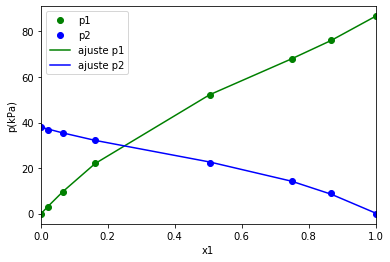

R2 para ajuste de p1 0.9999813273139265
R2 para ajuste de p2 0.9996782879562334


In [3]:
#Defino una función para ajustar un polinomio de grado 3
def pol3(x,a,b,c,d):
  yfit = []
  for i in x:
    y=a*(i**3)+b*(i**2)+c*i+d
    yfit.append(y)
  return np.array(yfit)

#Llamo a curve_fit y guardo los parámetros del ajuste (coeficientes) optimizados y sus covarianzas asociadas:

paramp1,paramcovarp1 = curve_fit(pol3,x1, p1) 
paramp2,paramcovarp2 = curve_fit(pol3,x1, p2) 

#Grafico los puntos junto con el ajuste, además de imprimir el R2 de cada uno

p1pred=pol3(x1,*paramp1) 
p2pred=pol3(x1,*paramp2) 

plt.plot(x1,p1,'bo', label="p1",color='green') 
plt.plot(x1,p2,'bo', label="p2",color='blue') 
plt.plot(x1,p1pred, label="ajuste p1",color='green') 
plt.plot(x1,p2pred, label="ajuste p2",color='blue') 
plt.xlabel('x1') #Rótulo de eje horizontal
plt.ylabel('p(kPa)') #Rótulo de eje vertical
plt.xlim([0.0, 1.0]) #Solo nos interesa el plot en este rango de x1
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla

print("R2 para ajuste de p1", r2_score(p1, p1pred))
print("R2 para ajuste de p2", r2_score(p2, p2pred))

Las constantse de Henry están dada por:


$$  k^{H}_{1(2)}= \frac{d p_{1}}{d x_{1}} \big |_{x_{1}\to0} \quad k^{H}_{2(1)}= \frac{d p_{2}}{d x_{2}} \big |_{x_{2}\to0}$$ 

Trabajaremos con la siguiente expresión analítica de $p_{1}$ y $p_{2}$:

$$ p_{i} = A_{i} x_{1}^{3} + B_{i} x_{1}^{2} + C_{i} x_{1} $$

Donde $i=1,2$. Luego:

$$ \frac{d p_{i}}{d x_{1}} = 3 A_{i} x_{1}^{2} + 2 B_{i} x_{1} +C_{i} $$ 

Y haciendo tender $x_{1}$ a $0$ obtenemos la consante de Henry de $1$:

$$ k^{H}_{1(2)}=\frac{d p_{1}}{d x_{1}}\big |_{x_{1}\to0} = C_{1} $$

Y para $2$ usamos que $x_{2}=1-x_{1}$ y $dx_{2}=dx_{1}$:

$$ k^{H}_{2(1)}=\frac{d p_{2}}{d x_{2}}\big |_{x_{2}\to0} = -\frac{d p_{2}}{d x_{1}}\big |_{x_{1}\to1}=-3A_{2}-2B_{2}-C_{2}$$

Solo nos queda utilizar estas ecuaciones para calcular las constantes de Henry:

In [4]:
#Los parámetros de los ajustes están en los array paramp1 y paramp2, y en el orden [A,B,C]
kH1=paramp1[2] 
kH2=-3*paramp2[0]-2*paramp2[1]-paramp2[2] 

print('kH1 =',kH1,'kPa')
print('kH2 =',kH2,'kPa')

kH1 = 157.9427077325949 kPa
kH2 = 71.31611070013597 kPa
